The O-C (“observed minus computed”) diagram is a simple
concept: fit the observational data with a model and examine
the quality of the fit. That is, for all the observed datapoints,
such as the times of eclipses of an eclipsing binary star, or
times of maximum of a pulsator, subtract the times the model
would predict, and then plot those “residuals” of the model
fit. This allows one to magnify the residuals and study them.
Patterns in the residuals may explain how the system has
changed, how the model should be adjusted, or whether a
different form of model should be used.

The O–C Diagram (“O minus C”) is based on the following idea: if a star is perfectly periodic, then every period is exactly the same. If it’s periodic, it has a maximum at time $t_0$ (the epoch), and the period is $P$. The next maximum will occur at $t_0 + P,\, t_0 + 2P$, then $t_0 + 3P$, etc.

You'll be given a table of observed minima (= time values, which may not be successive) in days or Julian days and their uncertainties,

1. Find $\Delta t_{\rm min} = t_{k+1} - t_k$, i.e., the time intervals between successive observed minima.
    
2. Find the average of these time intervals: $\overline{\Delta t}_{\rm min}$.
    
3. Estimate the full period of the star as $P = 2\times \overline{\Delta t}_{\rm min}$.

*Why?* In eclipsing binaries, the sequence of minima alternates: Primary, Secondary, Primary, etc. So the time between two successive same-type minima (e.g., primary-to-primary) is the full orbital period. The time between adjacent minima is roughly half the period, assuming symmetry.
    
4. Choose an initial observed minimum time, call it $M_0$. Then for any observed minimum $M_{\rm obs,k}$ at time $t_k$, calculate the epoch number:
    
    $$E_k = \frac{M_{\rm obs,k} - M_0}{P}$$

Here, $E_k$ is the epoch number, representing how many full (or half) cycles have occurred since $M_0$.

**Round $E_k$ to the nearest integer or half-integer, depending on whether the minima are of the same type (primary-to-primary) or alternate (primary-to-secondary)**
    
5. Calculate the corresponding predicted (calculated) time of minimum using:
    \[
    M_{\rm cal,k} = M_0 + P \cdot E_k
    \]
    
6. Compute the difference: $O - C = M_{\rm obs,k} - M_{\rm cal,k}$.
    
7. Plot the $O-C$ values against the epoch number $E$ (i.e., $x$-axis = $E_k$, $y$-axis = $O - C$).
    
8. Fit a regression line (typically linear) to analyze period variations.
    
9. Interpretation:
- If the O–C plot is a straight line with non-zero slope, your assumed period is slightly incorrect.
- A **positive slope** indicates that the assumed period is too short (you’re "late" more and more over time).
- A **negative slope** means the period was overestimated.
- The **intercept** gives the error in the initial epoch $M_0$.

    
 *Correction* Update your period as $P_{\rm new} = P + \text{slope}$ and initial epoch as $M_0^{\rm new} = M_0 + \text{intercept}$, then repeat the O–C analysis.



# IOAA Book: Analysis of times of minima:

Data Table

| No. | Date of Minimum (UT) | Time of Minimum (Heliocentric JD) | Error     |
|-----|-----------------------|------------------------------------|-----------|
| 1   | 22 December 2006      | 2 454 092.4111                     | 0.0004    |
| 2   | 23 December 2006      | 2 454 092.5478                     | 0.0002    |
| 3   | 23 September 2007     | 2 454 367.3284                     | 0.0005    |
| 4   | 23 September 2007     | 2 454 367.4656                     | 0.0005    |
| 5   | 15 October 2007       | 2 454 388.5175                     | 0.0009    |
| 6   | 15 October 2007       | 2 454 388.6539                     | 0.0011    |
| 7   | 26 August 2008        | 2 454 704.8561                     | 0.0002    |
| 8   | 5 November 2008       | 2 454 776.4901                     | 0.0007    |
| 9   | 3 January 2009        | 2 454 835.2734                     | 0.0007    |
| 10  | 15 January 2009       | 2 454 847.3039                     | 0.0004    |
| 11  | 15 January 2009       | 2 454 847.4412                     | 0.0001    |
| 12  | 16 January 2009       | 2 454 847.5771                     | 0.0004    |

*Table: Observed times of minima for V1107 Cassiopeae*


## Finding $\overline{\Delta t}_{\rm min}$:

In [1]:
import pandas as pd

# Define the observed JD values
jd_values = [
    2454092.4111,
    2454092.5478,
    2454367.3284,
    2454367.4656,
    2454388.5175,
    2454388.6539,
    2454704.8561,
    2454776.4901,
    2454835.2734,
    2454847.3039,
    2454847.4412,
    2454847.5771
]

# Convert to DataFrame
df = pd.DataFrame({
    "No": list(range(1, 13)),
    "JD": jd_values
})

# Threshold for "very close" minima (e.g., 1 day)
threshold = 2  # days

# Loop and print pairs with small ∆t
print(f"{'Pair #':<7} | {'Between Minima':<17} | {'Δt (days)':>12}")
print("-" * 45)

pair_num = 1
for i in range(len(df) - 1):
    delta_t = df.loc[i + 1, "JD"] - df.loc[i, "JD"]
    if delta_t <= threshold:
        print(f"{pair_num:<7} | {df.loc[i, 'No']} and {df.loc[i + 1, 'No']:<13} | {delta_t:12.4f}")
        pair_num += 1


Pair #  | Between Minima    |    Δt (days)
---------------------------------------------
1       | 1 and 2             |       0.1367
2       | 3 and 4             |       0.1372
3       | 5 and 6             |       0.1364
4       | 10 and 11            |       0.1373
5       | 11 and 12            |       0.1359


**Calculating Period: $P=2\times \Delta \overline{t}$**

In [2]:
import numpy as np

# Recalculate ∆t for close pairs (or reuse from previous step)
close_dts = []
for i in range(len(df) - 1):
    delta_t = df.loc[i + 1, "JD"] - df.loc[i, "JD"]
    if delta_t <= threshold:
        close_dts.append(delta_t)

# Convert to numpy array for convenience
close_dts = np.array(close_dts)

# Compute mean ∆t and estimated period
mean_dt = np.mean(close_dts)
estimated_period = 2 * mean_dt

print(f"Average Δt between close successive minima: {mean_dt:.5f} days")
print(f"Estimated Period (P = 2 × mean Δt): {estimated_period:.5f} days")


Average Δt between close successive minima: 0.13670 days
Estimated Period (P = 2 × mean Δt): 0.27340 days


## Calculation Epoch, $E$

In [6]:
# Use M0 as the reference epoch
M0 = 2454092.4111

# Use the estimated period from earlier
P = estimated_period  # Make sure this is defined from your earlier cell

# Compute Epochs
df['Epoch'] = (df['JD'] - M0) / P

# Print Epochs
print(f"{'No.':<5} | {'M_obs (JD)':<15} | {'Epoch (E)':>10}")
print("-" * 38)

for i, row in df.iterrows():
    print(f"{int(row['No']):<5} | {row['JD']:<15.4f} | {row['Epoch']:>10.1f}")


No.   | M_obs (JD)      |  Epoch (E)
--------------------------------------
1     | 2454092.4111    |        0.0
2     | 2454092.5478    |        0.5
3     | 2454367.3284    |     1005.5
4     | 2454367.4656    |     1006.1
5     | 2454388.5175    |     1083.1
6     | 2454388.6539    |     1083.6
7     | 2454704.8561    |     2240.1
8     | 2454776.4901    |     2502.1
9     | 2454835.2734    |     2717.1
10    | 2454847.3039    |     2761.1
11    | 2454847.4412    |     2761.6
12    | 2454847.5771    |     2762.1


**The epochs should be rounded to nearest integer or half integer**

In [10]:
# Round epochs to nearest 0.5 for meaningful O-C comparison
df['Epoch_rounded'] = np.round(df['Epoch'] * 2) / 2

# Recalculate M_cal with rounded epoch
df['M_cal'] = M0 + P * df['Epoch_rounded']

# Calculate O-C
df['O_minus_C'] = df['JD'] - df['M_cal']

# Print results
print(f"{'No.':<5} | {'M_obs (JD)':<15} | {'Epoch':<10} | {'M_cal (JD)':<15} | {'O-C (days)':>12}")
print("-" * 68)

for i, row in df.iterrows():
    print(f"{int(row['No']):<5} | {row['JD']:<15.4f} | {row['Epoch_rounded']:<10.1f} | {row['M_cal']:<15.4f} | {row['O_minus_C']:>12.4f}")


No.   | M_obs (JD)      | Epoch      | M_cal (JD)      |   O-C (days)
--------------------------------------------------------------------
1     | 2454092.4111    | 0.0        | 2454092.4111    |       0.0000
2     | 2454092.5478    | 0.5        | 2454092.5478    |       0.0000
3     | 2454367.3284    | 1005.5     | 2454367.3148    |       0.0136
4     | 2454367.4656    | 1006.0     | 2454367.4515    |       0.0141
5     | 2454388.5175    | 1083.0     | 2454388.5033    |       0.0142
6     | 2454388.6539    | 1083.5     | 2454388.6400    |       0.0139
7     | 2454704.8561    | 2240.0     | 2454704.8271    |       0.0290
8     | 2454776.4901    | 2502.0     | 2454776.4579    |       0.0322
9     | 2454835.2734    | 2717.0     | 2454835.2389    |       0.0345
10    | 2454847.3039    | 2761.0     | 2454847.2685    |       0.0354
11    | 2454847.4412    | 2761.5     | 2454847.4052    |       0.0360
12    | 2454847.5771    | 2762.0     | 2454847.5419    |       0.0352


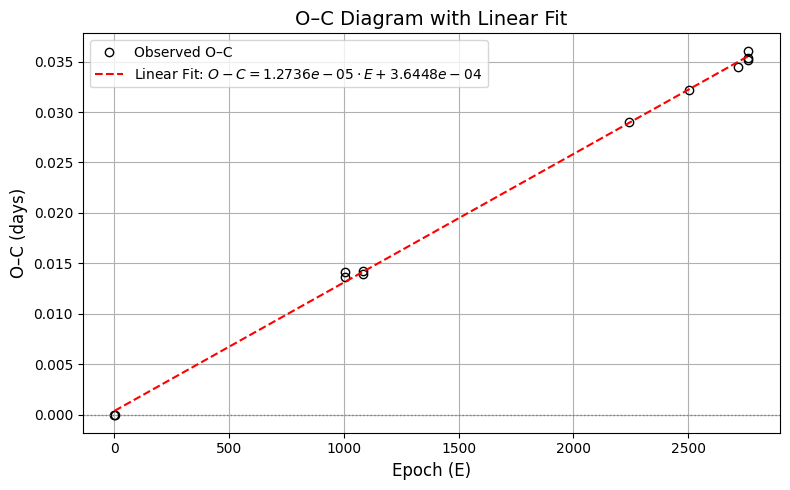

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Use rounded epoch and O-C columns
E = df['Epoch_rounded'].values
OC = df['O_minus_C'].values

# Linear regression fit: O-C = a * E + b
coeffs = np.polyfit(E, OC, 1)  # degree 1 for linear
a, b = coeffs

# Generate fitted line
E_fit = np.linspace(E.min(), E.max(), 300)
OC_fit = a * E_fit + b

# Plot
plt.figure(figsize=(8, 5))
plt.plot(E, OC, 'o', color='black', label='Observed O–C', markerfacecolor='none')
plt.plot(E_fit, OC_fit, 'r--', label=f'Linear Fit: $O-C = {a:.4e} \\cdot E + {b:.4e}$')

plt.axhline(0, color='gray', linestyle=':', linewidth=1)
plt.xlabel('Epoch (E)', fontsize=12)
plt.ylabel('O–C (days)', fontsize=12)
plt.title('O–C Diagram with Linear Fit', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


“O-C” diagram shows difference between observed and calculated
moments of minima. The difference is non-zero because our initial
estimate of $P$ and $M_0$ may not be exact. The linear fit to all points
in the graph will help us eliminate these errors. The $y$-intercept of
this graph will give you error in $M_0$. To get error in initial period,
realise that slope of this graph is nothing but average (per period)
difference between “observed” and “calculated” moments. This is
exactly the error in initial period.

To improve your estimates of the initial moment $M_0$ and period $P$, you can **use the linear regression result** from the $O-C$ diagram. Let's walk through the full procedure with the math, interpretation, and then give you the Python code.

---

### ✅ **1. Mathematical Idea**

You’ve fit a line to your $O-C$ values:

$$
O - C = a \cdot E + b
$$

But we know:

$$
O - C = M_{\text{obs}} - (M_0 + P \cdot E)
\Rightarrow M_{\text{obs}} = M_0 + P \cdot E + (O - C)
$$

This means that the error in your assumed period and epoch is reflected in the slope and intercept of the line. Therefore:

#### ✅ Improved values:

* **Improved Period**:

  $$
  P_{\text{new}} = P + a
  $$

  where $a$ is the slope of the O–C diagram.

* **Improved $M_0$**:

  $$
  M_{0, \text{new}} = M_0 + b
  $$

  where $b$ is the y-intercept of the O–C diagram.

---

### ✅ **2. Estimate the errors (uncertainty)**

We use `np.polyfit(..., cov=True)` to get the covariance matrix of the fit, which gives us the uncertainties.

### 📌 Interpretation

* **If the slope $a$ is positive** → your assumed $P$ was too small.
* **If the intercept $b$ is negative** → your initial $M_0$ was too early.
* The uncertainties $\sigma_a$ and $\sigma_b$ give the 1-sigma confidence level for your new values.

---

Let me know if you'd like to:

* Refold the data using $P_{\text{new}}$ and $M_0^{\text{new}}$
* Plot the **residual-corrected** O–C diagram
* Or fit a **parabolic O–C** if you suspect the period is changing non-linearly (as in long-term mass transfer systems)


In [14]:
print(f"Slope (a)       = {a:.6f} days/epoch")
print(f"Y-intercept (b) = {b:.6f} days")


Slope (a)       = 0.000013 days/epoch
Y-intercept (b) = 0.000364 days


In [16]:
# Use polyfit with covariance estimation
coeffs, cov = np.polyfit(df['Epoch_rounded'], df['O_minus_C'], 1, cov=True)
a, b = coeffs  # slope and intercept
a_err, b_err = np.sqrt(np.diag(cov))  # standard errors

# Improved estimates
P_new = P + a
M0_new = M0 + b

# Print results
print(f"Original Period       = {P:.10f} days")
print(f"Improved Period       = {P_new:.10f} ± {a_err:.10f} days")

print(f"Original M0           = {M0:.10f} JD")
print(f"Improved M0           = {M0_new:.10f} ± {b_err:.10f} JD")


Original Period       = 0.2733999997 days
Improved Period       = 0.2734127360 ± 0.0000001236 days
Original M0           = 2454092.4111000001 JD
Improved M0           = 2454092.4114644770 ± 0.0002416694 JD


# O-C Analysis I
Based on https://arxiv.org/pdf/0909.1564

Data Table:

| \(n\) | Observed Midpoint of Transition (HJD − 2450000) | Uncertainty \(s\) |
|:-----:|:-----------------------------------------------:|:------------------:|
| 4     | 3967.5180                                       | 37                 |
| 13    | 3989.7529                                       | 25                 |
| 15    | 3994.6939                                       | 27                 |
| 34    | 4041.6358                                       | 26                 |
| 140   | 4303.5209                                       | 26                 |
| 142   | 4308.4613                                       | 39                 |
| 274   | 4634.5828                                       | 26                 |
| 276   | 4639.5232                                       | 27                 |

Given, $M_0 = 2,453,957.6348$ HJD and Period, $\bar{P} = (2.470 621 \pm 0.000 020)$ d.

In [23]:
import pandas as pd

# Input data
data = {
    'n': [4, 13, 15, 34, 140, 142, 274, 276],
    'M_obs_minus_2450000': [3967.5180, 3989.7529, 3994.6939, 4041.6358,
                            4303.5209, 4308.4613, 4634.5828, 4639.5232],
    'Uncertainty_s': [37, 25, 27, 26, 26, 39, 26, 27]
}

# Create DataFrame
df = pd.DataFrame(data)

# Constants
M0 = 2453957.6348
P = 2.470621
seconds_per_day = 86400

# Restore full M_obs
df['M_obs'] = df['M_obs_minus_2450000'] + 2450000

# Calculate M_cal and O-C
df['M_cal'] = M0 + df['n'] * P
df['O_minus_C_days'] = df['M_obs'] - df['M_cal']
df['O_minus_C_sec'] = (df['O_minus_C_days'] * seconds_per_day).round().astype(int)  # Convert to integer seconds

# Print table
print(f"{'n':<5} | {'M_obs (HJD)':<15} | {'M_cal (HJD)':<15} | {'O-C (days)':>12} | {'O-C (sec)':>11}")
print("-" * 75)
for i, row in df.iterrows():
    print(f"{row['n']:<5} | {row['M_obs']:<15.4f} | {row['M_cal']:<15.4f} | {row['O_minus_C_days']:>12.5f} | {int(row['O_minus_C_sec']):>11}")  # Force integer display

n     | M_obs (HJD)     | M_cal (HJD)     |   O-C (days) |   O-C (sec)
---------------------------------------------------------------------------
4.0   | 2453967.5180    | 2453967.5173    |      0.00072 |          62
13.0  | 2453989.7529    | 2453989.7529    |      0.00003 |           2
15.0  | 2453994.6939    | 2453994.6941    |     -0.00022 |         -19
34.0  | 2454041.6358    | 2454041.6359    |     -0.00011 |         -10
140.0 | 2454303.5209    | 2454303.5217    |     -0.00084 |         -73
142.0 | 2454308.4613    | 2454308.4630    |     -0.00168 |        -145
274.0 | 2454634.5828    | 2454634.5850    |     -0.00215 |        -186
276.0 | 2454639.5232    | 2454639.5262    |     -0.00300 |        -259


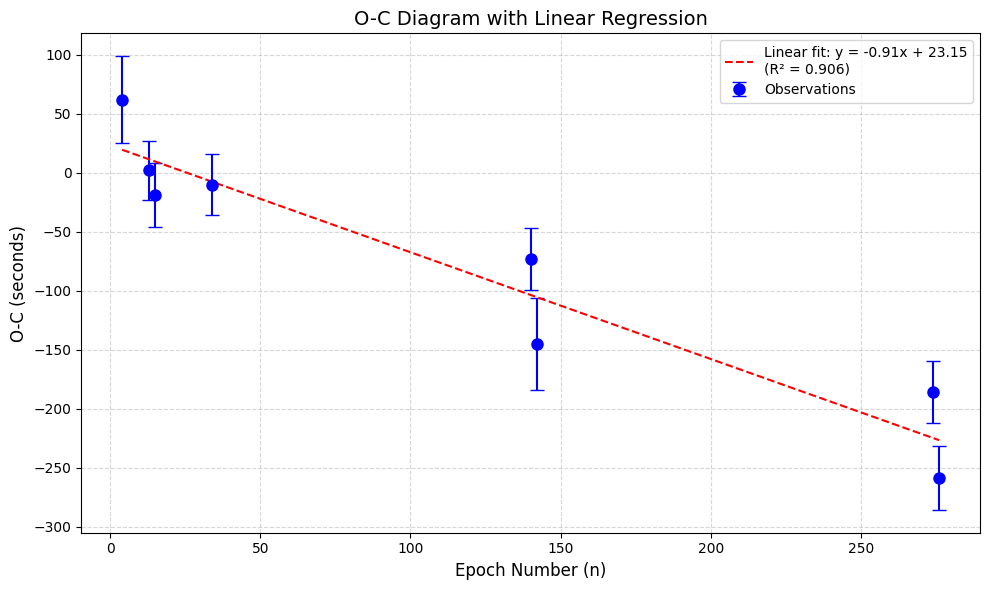

In [25]:
# Plot O-C diagram with linear
from scipy import stats
plt.figure(figsize=(10, 6))

# Plot data points with error bars
plt.errorbar(df['n'], df['O_minus_C_sec'], yerr=df['Uncertainty_s'],
             fmt='o', color='blue', markersize=8, capsize=5, label='Observations')

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['n'], df['O_minus_C_sec'])
x_fit = np.array([min(df['n']), max(df['n'])])
y_fit = slope * x_fit + intercept

# Plot regression line
plt.plot(x_fit, y_fit, 'r--', label=f'Linear fit: y = {slope:.2f}x + {intercept:.2f}\n(R² = {r_value**2:.3f})')

# Formatting
plt.xlabel('Epoch Number (n)', fontsize=12)
plt.ylabel('O-C (seconds)', fontsize=12)
plt.title('O-C Diagram with Linear Regression', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

In [26]:
# Calculate and display regression parameters with errors
slope, intercept, r_value, p_value, std_err = stats.linregress(df['n'], df['O_minus_C_sec'])

# Calculate standard errors
n = len(df['n'])
x_mean = np.mean(df['n'])
Sxx = np.sum((df['n'] - x_mean)**2)
slope_err = std_err * np.sqrt(1/Sxx)
intercept_err = std_err * np.sqrt(1/n + x_mean**2/Sxx)

print("Linear Regression Results:")
print(f"Slope: {slope:.4f} ± {slope_err:.4f} sec/epoch")
print(f"Intercept: {intercept:.2f} ± {intercept_err:.2f} sec")
print(f"Standard error of estimate: {std_err:.2f} sec")
print(f"R-squared: {r_value**2:.4f}")

Linear Regression Results:
Slope: -0.9056 ± 0.0004 sec/epoch
Intercept: 23.15 ± 0.06 sec
Standard error of estimate: 0.12 sec
R-squared: 0.9064


In [27]:
# Using your slope/intercept from stats.linregress
P_nominal = 2.470621  # days
t0_nominal = 2453957.6348  # HJD

# Convert slope (sec/epoch) to period change (days/epoch)
delta_P = slope / 86400  # days/epoch
P_refined = P_nominal + delta_P

# Convert intercept (sec) to time offset (days)
delta_t0 = intercept / 86400  # days
t0_refined = t0_nominal + delta_t0

# Uncertainties
sigma_P = slope_err / 86400  # days/epoch
sigma_t0 = intercept_err / 86400  # days

print("Refined Parameters:")
print(f"P_refined = {P_refined:.8f} ± {sigma_P:.8f} days/epoch")
print(f"t0_refined = {t0_refined:.8f} ± {sigma_t0:.8f} HJD")

Refined Parameters:
P_refined = 2.47061052 ± 0.00000000 days/epoch
t0_refined = 2453957.63506796 ± 0.00000070 HJD


## O-C Analysis II



In [4]:
import pandas as pd
import numpy as np

# Given data
observed_times = [
    2457753.4392, 2457760.8614, 2457766.3547, 2457777.3482, 2457785.1075,
    2457795.8013, 2457801.2967, 2457804.8658, 2457809.3882, 2457814.2463,
    2457817.1757, 2457821.6815, 2457825.2596, 2457834.0324, 2457839.5288,
    2457845.3696, 2457850.5560, 2457856.4145, 2457861.9358, 2457867.1256
]

# Constants
P0 = 0.324  # days (initial period estimate)
t0 = observed_times[0]  # First observed minimum as reference epoch (t_p,0)

# Calculate epoch numbers (n) properly
n_values = np.round((np.array(observed_times) - t0) / P0).astype(int)

# Calculate C_n and O-C
C_n = t0 + n_values * P0
O_minus_C = np.array(observed_times) - C_n

# Create DataFrame
df = pd.DataFrame({
    'Obs #': np.arange(1, len(observed_times)+1),
    't_p/JD': observed_times,
    'n': n_values,
    'C_n': C_n,
    'O_n-C_n [d]': O_minus_C,
    'O_n-C_n [s]': O_minus_C * 86400  # Convert days to seconds
})

# Print formatted table
print(f"{'Obs #':<6} | {'t_p/JD':<14} | {'n':<4} | {'C_n':<12} | {'O-C [days]':<12} | {'O-C [seconds]':<12}")
print("-" * 80)
for _, row in df.iterrows():
    print(f"{row['Obs #']:<6} | {row['t_p/JD']:<14.4f} | {row['n']:<4} | {row['C_n']:<12.4f} | {row['O_n-C_n [d]']:<12.4f} | {row['O_n-C_n [s]']:<12.2f}")

Obs #  | t_p/JD         | n    | C_n          | O-C [days]   | O-C [seconds]
--------------------------------------------------------------------------------
1.0    | 2457753.4392   | 0.0  | 2457753.4392 | 0.0000       | 0.00        
2.0    | 2457760.8614   | 23.0 | 2457760.8912 | -0.0298      | -2574.72    
3.0    | 2457766.3547   | 40.0 | 2457766.3992 | -0.0445      | -3844.80    
4.0    | 2457777.3482   | 74.0 | 2457777.4152 | -0.0670      | -5788.80    
5.0    | 2457785.1075   | 98.0 | 2457785.1912 | -0.0837      | -7231.68    
6.0    | 2457795.8013   | 131.0 | 2457795.8832 | -0.0819      | -7076.16    
7.0    | 2457801.2967   | 148.0 | 2457801.3912 | -0.0945      | -8164.80    
8.0    | 2457804.8658   | 159.0 | 2457804.9552 | -0.0894      | -7724.16    
9.0    | 2457809.3882   | 173.0 | 2457809.4912 | -0.1030      | -8899.20    
10.0   | 2457814.2463   | 188.0 | 2457814.3512 | -0.1049      | -9063.36    
11.0   | 2457817.1757   | 197.0 | 2457817.2672 | -0.0915      | -7905.60    


/tmp/ipython-input-8-2374809487.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['normalized_OC'] = filtered_df['O_n-C_n [d]'] / filtered_df['n']


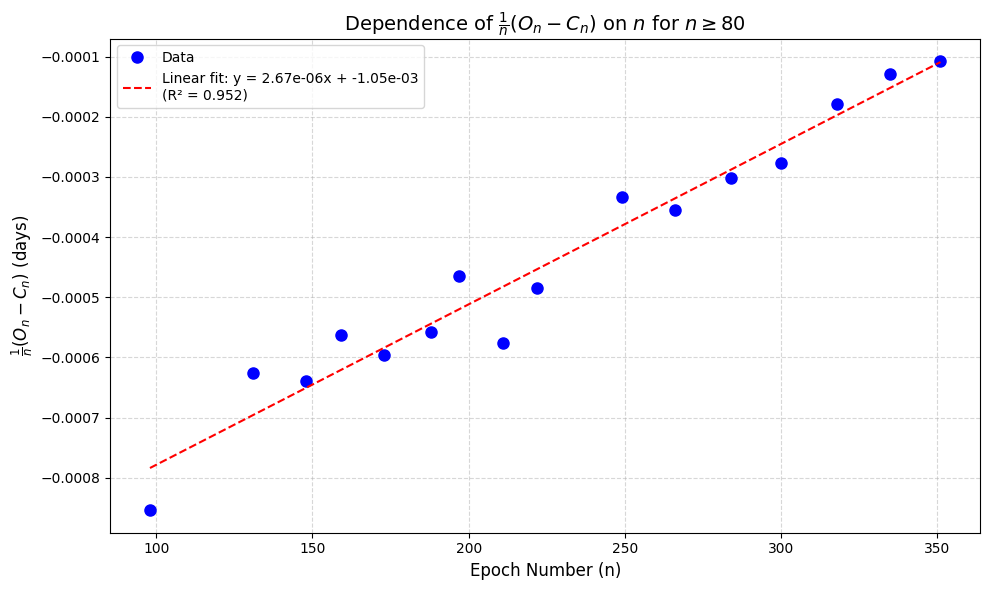

Linear Regression Results:
Slope: 2.668e-06 ± 1.600e-07 days/epoch²
Intercept: -1.045e-03 days/epoch
R-squared: 0.952


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Filter data for n >= 80
filtered_df = df[df['n'] >= 80]

# Calculate (O_n - C_n)/n
filtered_df['normalized_OC'] = filtered_df['O_n-C_n [d]'] / filtered_df['n']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_df['n'], filtered_df['normalized_OC'])
x_fit = np.array([min(filtered_df['n']), max(filtered_df['n'])])
y_fit = slope * x_fit + intercept

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['n'], filtered_df['normalized_OC'], 'bo', markersize=8, label='Data')
plt.plot(x_fit, y_fit, 'r--',
         label=f'Linear fit: y = {slope:.2e}x + {intercept:.2e}\n(R² = {r_value**2:.3f})')

# Formatting
plt.xlabel('Epoch Number (n)', fontsize=12)
plt.ylabel(r'$\frac{1}{n}(O_n - C_n)$ (days)', fontsize=12)
plt.title(r'Dependence of $\frac{1}{n}(O_n - C_n)$ on $n$ for $n \geq 80$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10, loc='best')
plt.tight_layout()

# Show plot
plt.show()

# Print regression results
print("Linear Regression Results:")
print(f"Slope: {slope:.3e} ± {std_err:.3e} days/epoch²")
print(f"Intercept: {intercept:.3e} days/epoch")
print(f"R-squared: {r_value**2:.3f}")

For an eclipsing binary with a **linearly changing period**, the observed minus calculated times follow:

$$O_n - C_n = \underbrace{n(P - P_0)}_{\text{Period offset}} + \underbrace{\frac{1}{2}n(n+1)\Delta P}_{\text{Period change}}$$

Normalizing by $n$ gives:$
\frac{O_n - C_n}{n} = (P - P_0) + \frac{n+1}{2}\Delta P$

For large $n$ ($n \geq 80$), this simplifies to:
$\frac{O_n - C_n}{n} \approx \frac{\Delta P}{2} \cdot n \quad \text{(linear trend)}$

---

| **Feature**          | **Raw O-C Plot**               | **Normalized Plot**               |
|----------------------|--------------------------------|-----------------------------------|
| **Small $\Delta P$** | Hidden in parabolic trend      | Clearly visible as slope          |
| **Interpretation**   | Requires quadratic fit         | Linear fit directly gives $\Delta P$ |
| **Units**           | Days                           | Days/epoch                        |

Key advantages:
- **Amplifies tiny period changes** (even $\Delta P \sim 10^{-6}$ days/epoch)
- **Decouples effects**:
  - Intercept $\approx P - P_0$ (period correction)
  - Slope $\approx \frac{\Delta P}{2}$ (period derivative)


- **Slope** = $\frac{\Delta P}{2}$ → Period change rate  
  Example: If slope = $2 \times 10^{-6}$ days/epoch² → $\Delta P = 4 \times 10^{-6}$ days/epoch
- **Intercept** = $P - P_0$ → Initial period correction  
- **R²** → Goodness of fit (1 = perfect linearity)

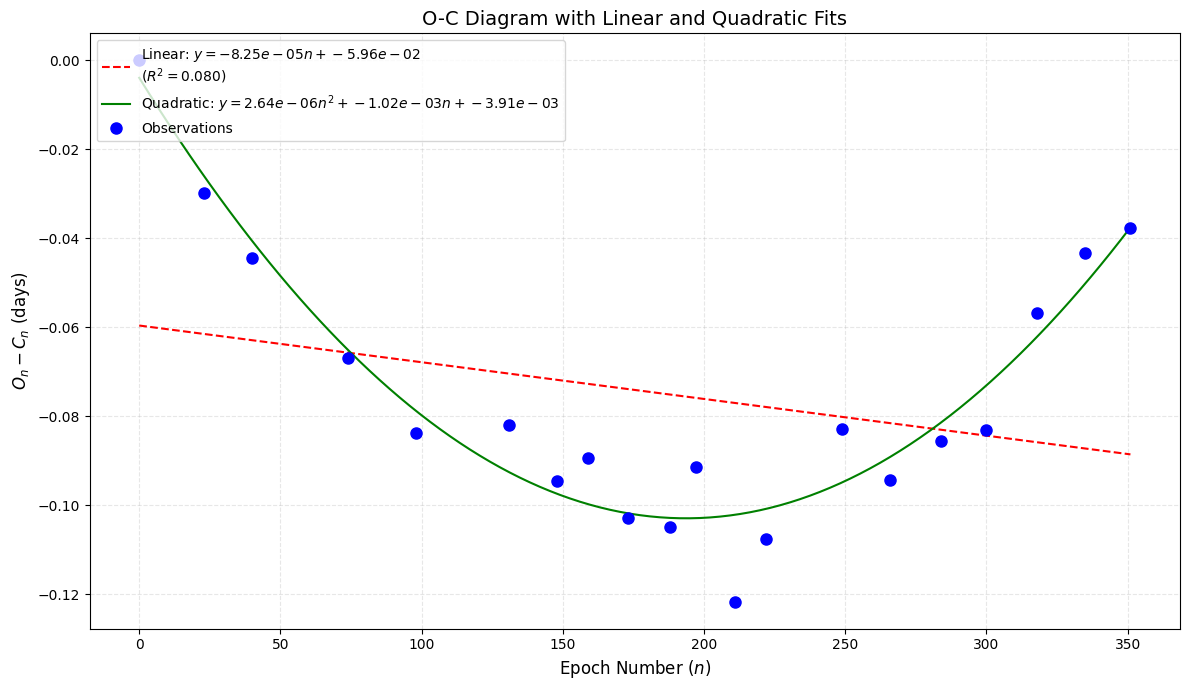

Linear Fit Results:
Slope (dP/dn): -8.254e-05 ± 1.600e-07 days/epoch
Intercept: -5.961e-02 days
R²: 0.0798

Quadratic Fit Results:
Quadratic term (½ΔP): 2.642e-06 days/epoch² → ΔP = 5.283e-06 days/epoch
Linear term: -1.023e-03 days/epoch
Constant: -3.906e-03 days
R²: 0.9310


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit

# Set up the plot
plt.figure(figsize=(12, 7))

# Plot raw data
plt.errorbar(df['n'], df['O_n-C_n [d]'], fmt='o', color='blue',
             markersize=8, label='Observations')

# --- Linear Fit ---
slope, intercept, r_lin, _, _ = stats.linregress(df['n'], df['O_n-C_n [d]'])
x_fit = np.linspace(min(df['n']), max(df['n']), 100)
y_lin = slope * x_fit + intercept
plt.plot(x_fit, y_lin, 'r--',
         label=f'Linear: $y = {slope:.2e}n + {intercept:.2e}$\n($R^2 = {r_lin**2:.3f}$)')

# --- Quadratic Fit ---
def quadratic(n, a, b, c):
    return a * n**2 + b * n + c

popt, pcov = curve_fit(quadratic, df['n'], df['O_n-C_n [d]'])
a, b, c = popt
y_quad = quadratic(x_fit, *popt)
plt.plot(x_fit, y_quad, 'g-',
         label=f'Quadratic: $y = {a:.2e}n^2 + {b:.2e}n + {c:.2e}$')

# Calculate R² for quadratic fit
residuals = df['O_n-C_n [d]'] - quadratic(df['n'], *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((df['O_n-C_n [d]'] - np.mean(df['O_n-C_n [d]']))**2)
r_quad = 1 - (ss_res / ss_tot)

# --- Formatting ---
plt.xlabel('Epoch Number ($n$)', fontsize=12)
plt.ylabel('$O_n - C_n$ (days)', fontsize=12)
plt.title('O-C Diagram with Linear and Quadratic Fits', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()

# --- Print Results ---
print("Linear Fit Results:")
print(f"Slope (dP/dn): {slope:.3e} ± {std_err:.3e} days/epoch")
print(f"Intercept: {intercept:.3e} days")
print(f"R²: {r_lin**2:.4f}\n")

print("Quadratic Fit Results:")
print(f"Quadratic term (½ΔP): {a:.3e} days/epoch² → ΔP = {2*a:.3e} days/epoch")
print(f"Linear term: {b:.3e} days/epoch")
print(f"Constant: {c:.3e} days")
print(f"R²: {r_quad:.4f}")